# Лабораторна робота 3
### Студентки групи МІТ-31 
### Рубан Маргарити Юріївни

Завдання

Створити набір даних за допомогою DatasetGenerator

Завантажити набір даних для класифікації на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

(опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації на основі звичайних можливостей Python.

Для отриманих наборів даних провести встановленні кроки моделювання.

Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [68]:
X, y = make_regression(n_samples=512, n_features=10, n_informative=512, n_targets=1,  noise=0.0, shuffle=True, coef=False, random_state=None)

print(X,y)

[[ 1.76411633 -0.70083248  0.21378384 ... -0.00989759  0.36341647
   0.10610156]
 [-1.18051054  0.47930601 -0.46338355 ... -0.89054876 -0.52308304
   0.24894457]
 [-1.05040653  0.18201006 -2.83055309 ...  1.15986226 -0.28040077
  -2.06308057]
 ...
 [-0.81950196 -0.65910961  0.39395424 ...  0.25479449  0.75873474
  -0.41527491]
 [ 0.39347041 -0.92030756  1.19677889 ...  0.72557178  0.32725388
  -0.33798658]
 [-1.30552537  0.36234121 -1.15195067 ... -0.64315656 -1.30654571
   0.51711668]] [ 105.00980535  -68.00852068 -266.19890197 -251.63570162 -170.0326261
   28.50165774 -197.17645567  -11.81763489  -30.36157956  -14.81333553
  119.04601705    7.20104561 -337.74156793  310.89001765  209.42369295
  -39.11675073  115.37499705 -202.4689281   233.52109927 -211.68129214
  122.17616298   25.05597822  244.31865103 -189.90592411 -420.8918583
  160.03467759 -135.46357596  -15.74612454  -24.93215843  146.66457692
  -78.95835867  207.22685814  141.7144637  -151.21486125  265.21624227
 -125.3582325

In [69]:
df = pd.DataFrame(X, y)
df.to_csv('sklearn_data_set.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9
105.009805,1.764116,-0.700832,0.213784,1.206738,-0.206180,0.384669,-0.211200,-0.009898,0.363416,0.106102
-68.008521,-1.180511,0.479306,-0.463384,-0.660395,-0.520003,1.214487,0.967177,-0.890549,-0.523083,0.248945
-266.198902,-1.050407,0.182010,-2.830553,-0.134904,0.366075,-0.026655,-1.303157,1.159862,-0.280401,-2.063081
-251.635702,0.829735,-0.420920,-2.320238,1.446120,-0.215530,-2.553943,0.890399,-1.002068,-0.257824,-0.346917
-170.032626,-0.542122,-1.190250,0.268767,-0.112417,0.970564,-1.197289,0.099090,-0.528291,0.000836,-0.319295


In [70]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [71]:
df.replace({'M': 0, 'F':1,  "Normal":0, "LVH":1, "ST":2, "N":0, "Y":1, "Flat":0, "Up":1, "Down":2}, None, True)
#"TA":0, "ASY":1, "ATA":2, "NAP":3,

In [72]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,0,TA,110,264,0,0,132,0,1.2,0,1
914,68,0,ASY,144,193,1,0,141,0,3.4,0,1
915,57,0,ASY,130,131,0,0,115,1,1.2,0,1
916,57,1,ATA,130,236,0,1,174,0,0.0,0,1
917,38,0,NAP,138,175,0,0,173,0,0.0,1,0


In [73]:
print(df.shape)

(918, 12)


In [74]:
print(df['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


In [75]:
print(df.groupby('ChestPainType').size())

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64


/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


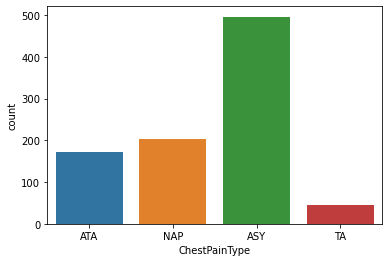

In [76]:
sns.countplot(df['ChestPainType'],label="Count")
plt.show()

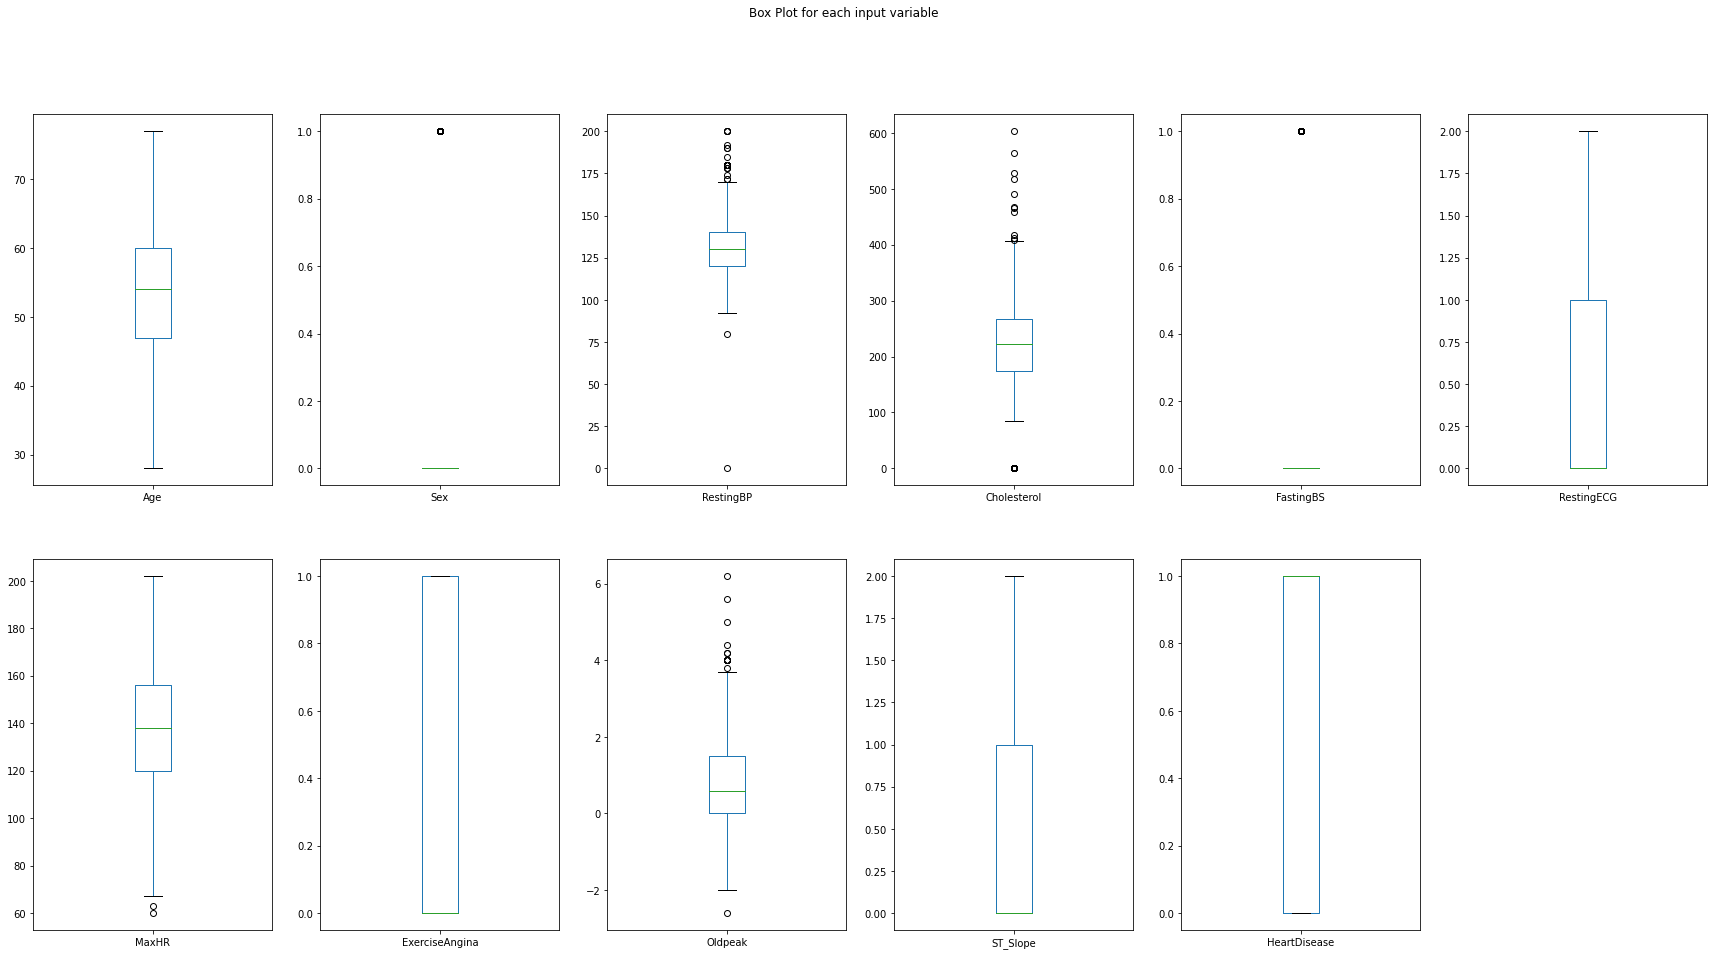

In [77]:
df.drop('ChestPainType', axis=1).plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False, figsize=(30,15), 
                                        title='Box Plot for each input variable')
plt.savefig('data_box_plot')
plt.show()

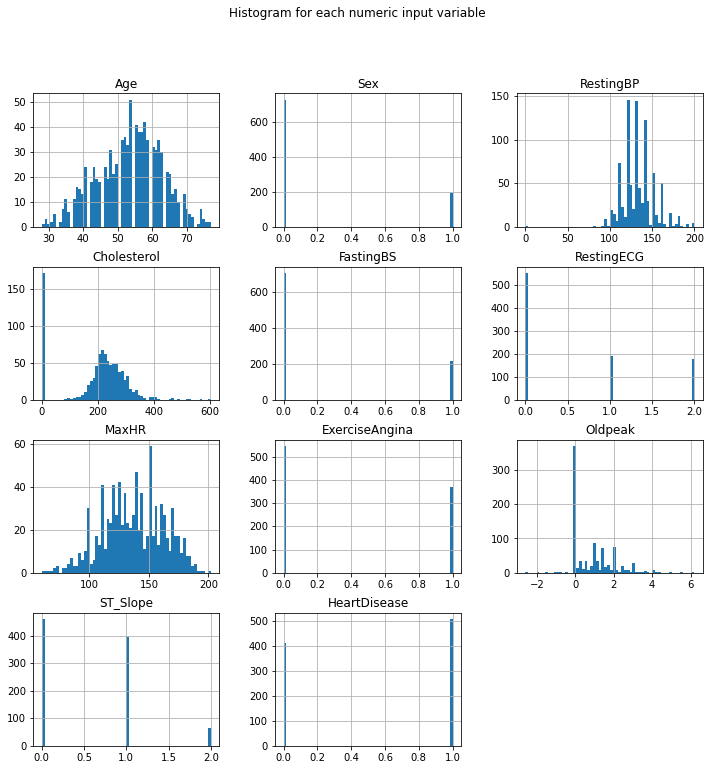

In [78]:
import pylab as pl
df.drop('ChestPainType' ,axis=1).hist(bins=60, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('data_hist')
plt.show()

In [79]:
import sklearn.model_selection
import sklearn.datasets
from sklearn.datasets import make_classification

X, y = sklearn.datasets.make_classification(n_samples=1024, n_features=20, class_sep=0.98, random_state=0)
model1 = (sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0),) # x_train, x_test, y_train, y_test

model2 = pd.DataFrame(data={'X':[np.random.uniform(-4.0, 4.0) for i in range(1000)],'Y':[np.random.uniform(-300.0, 300.0) for i in range(1000)],'Z':['90.0' for i in range(1000)]})

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.91


In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.88


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87


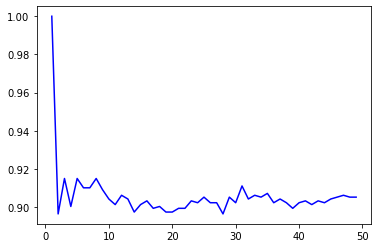

In [84]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Blue',)
plt.show()

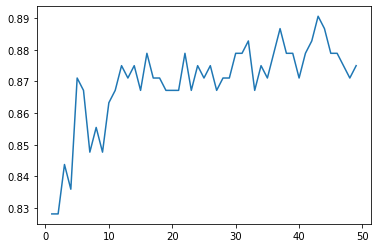

In [85]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.875

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.91


In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.92
Accuracy of GNB classifier on test set: 0.88


In [89]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.91


In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[106  20]
 [ 12 118]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       126
           1       0.86      0.91      0.88       130

    accuracy                           0.88       256
   macro avg       0.88      0.87      0.87       256
weighted avg       0.88      0.88      0.87       256



/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


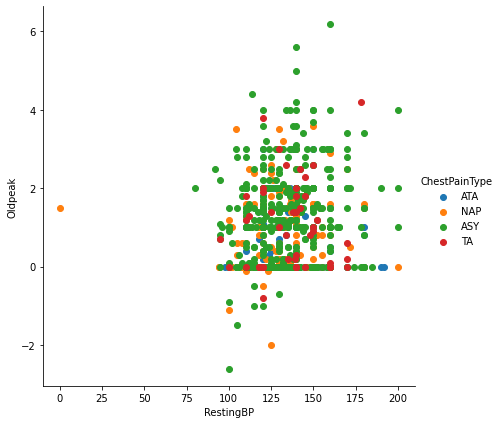

In [91]:
sns.FacetGrid(df, hue="ChestPainType", size=6) \
   .map(plt.scatter, "RestingBP", "Oldpeak") \
   .add_legend()

plt.show()

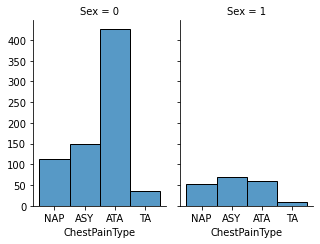

In [92]:
g = sns.FacetGrid(df, col="Sex", height=3.5, aspect=.65)
g.map(sns.histplot, "ChestPainType")

In [93]:
import random as rnd

sex = {0:'Man', 1:'Woman'}
age = {0:'<30', 1:'>30'}
car = {0:'have', 1:'dont have'}
marital_status = {0:'YES', 1:'NO'}
child = {0:'0', 1:'1', 2:'2', 3:'More than 3'}
citizenship = {0:'Ukraine', 1:'Russia', 2:'Belorussia', 3:'Italia', 4:'France', 5:'Germany', 6:'Romania'}
data = []
for i in range(0, 512):
    row = []
    row.append(round(rnd.uniform(1, 50), 2))
    row.append(round(rnd.uniform(1, 10), 2))
    row.append(sex[rnd.randint(0, 1)])
    row.append(age[rnd.randint(0, 1)])
    row.append(car[rnd.randint(0, 1)])
    row.append(marital_status[rnd.randint(0, 1)])
    row.append(child[rnd.randint(0, 3)])
    row.append(citizenship[rnd.randint(0, 6)])
    data.append(row)
df = pd.DataFrame(data, columns=['total_utility_bill', 'commission', 'sex', 'age', 'car', 'marital_status', 'child', 'citizenthip'])

In [94]:
df.replace({'Man': 0, 'Woman':1, '<30': 0, '>30':1, 'have':0, 'dont have':1, 'YES':0, 'NO':1, '0':0, '1':1, '2':2, 'More than 3':3, 'Ukraine': 0
, 'Russia':1, 'Belorussia':2, 'Italia':3, 'France':4, 'Germany':5, 'Romania':6}, None, True)

df.to_csv('my_data_set.csv')

In [95]:
df.head()

,total_utility_bill,commission,sex,age,car,marital_status,child,citizenthip
0,21.99,5.58,1,1,0,0,0,0
1,15.68,5.90,0,1,1,0,0,6
2,7.93,5.26,1,1,1,1,0,2
3,24.03,6.76,0,1,0,0,2,2
4,4.68,8.50,0,1,0,1,3,5


In [96]:
df.tail()

,total_utility_bill,commission,sex,age,car,marital_status,child,citizenthip
507,43.00,9.32,1,0,1,1,3,4
508,10.81,4.87,1,0,0,0,0,3
509,21.75,7.68,1,1,1,0,3,6
510,22.87,4.82,1,1,1,0,3,3
511,12.99,1.73,0,1,1,0,1,2


In [97]:
print("citizenthip")
print(df['citizenthip'].unique())

citizenthip
[0 6 2 5 1 3 4]


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_utility_bill  512 non-null    float64
 1   commission          512 non-null    float64
 2   sex                 512 non-null    int64  
 3   age                 512 non-null    int64  
 4   car                 512 non-null    int64  
 5   marital_status      512 non-null    int64  
 6   child               512 non-null    int64  
 7   citizenthip         512 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [99]:
df.describe()

,total_utility_bill,commission,sex,age,car,marital_status,child,citizenthip
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,26.227461,5.561426,0.507812,0.480469,0.478516,0.462891,1.494141,3.007812
std,14.290343,2.652932,0.500428,0.500107,0.500027,0.499109,1.145042,1.988208
min,1.040000,1.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.652500,3.297500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26.780000,5.465000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,38.952500,8.035000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000
max,50.000000,9.990000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000


/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


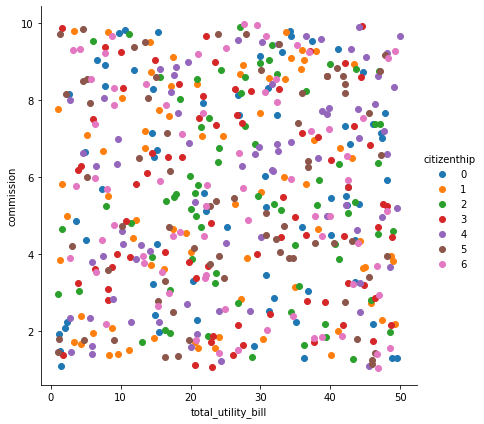

In [100]:
sns.FacetGrid(df, hue="citizenthip", size=6) \
   .map(plt.scatter, "total_utility_bill", "commission") \
   .add_legend()

plt.show()

In [101]:
features = list(df.columns[1:7])            	
target = df.columns[7]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:7]                         

# store response vector in "y"
y = df.iloc[:,7]                           


print(y.shape)
print(X.shape)

Features: ['commission', 'sex', 'age', 'car', 'marital_status', 'child']
Target: citizenthip
(512,)
(512, 6)


In [102]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedcitizenthip'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [0 1 2 3 4 5 6]
Response variable after encoding: [0 6 2 2 5 5 2 6 5 0 6 2 2 1 3 4 0 0 4 1 5 3 6 5 6 4 5 1 1 3 0 5 5 2 0 6 0
 5 0 4 0 4 0 6 1 6 1 6 6 6 3 2 2 4 1 4 6 3 6 0 0 3 4 2 1 3 4 1 1 3 4 0 5 0
 3 3 4 3 0 3 4 4 2 4 1 2 5 0 1 3 3 6 6 3 4 2 2 5 3 5 4 6 5 0 2 4 1 6 4 6 3
 5 1 6 0 0 5 0 1 0 3 5 1 1 5 6 3 4 4 3 5 2 6 1 3 0 4 3 5 3 0 2 2 4 5 1 0 3
 4 6 5 2 1 0 6 0 1 5 4 4 0 5 2 4 1 1 0 0 1 3 1 1 2 6 2 1 5 3 0 6 4 3 6 6 5
 4 2 6 2 2 5 6 3 3 2 0 0 1 1 6 1 2 1 4 6 4 6 5 3 1 1 0 6 4 5 3 3 1 3 6 2 4
 4 3 6 4 2 0 6 1 5 5 6 3 2 4 5 3 5 6 1 3 3 1 3 0 6 1 4 2 6 2 3 5 1 3 0 6 2
 5 0 1 6 1 2 1 0 2 1 5 1 3 0 6 0 2 6 0 5 6 2 4 3 0 0 0 5 1 5 6 2 6 0 3 3 1
 3 0 6 6 6 5 4 5 4 4 6 6 6 6 1 4 2 2 5 6 1 5 1 1 4 4 2 2 2 5 5 5 6 3 1 1 1
 0 3 2 5 1 0 5 1 1 1 2 6 3 5 6 5 0 1 6 5 2 0 4 2 2 3 0 0 0 4 5 4 2 4 3 4 4
 3 4 3 0 1 4 6 2 4 1 2 3 3 5 3 3 5 3 5 4 5 1 5 5 1 3 0 6 2 3 4 1 4 6 3 4 1
 0 2 2 1 5 0 0 5 3 1 0 0 4 2 4 4 6 1 0 2 1 4 3 2 4 1 6 4 3 4 4 2 6 2 5 0 5
 4 3 2 2 5 1 6 5 3 4 6 4 3 6 1 2 1 0 6 2 

,total_utility_bill,commission,sex,age,car,marital_status,child,citizenthip,Encodedcitizenthip
502,20.33,3.30,0,0,0,0,1,0,0
503,46.08,2.19,1,0,1,1,1,0,0
504,48.64,2.17,0,1,1,0,2,3,3
505,47.15,8.76,0,0,1,1,3,5,5
506,42.22,5.50,0,1,1,0,0,0,0
507,43.00,9.32,1,0,1,1,3,4,4
508,10.81,4.87,1,0,0,0,0,3,3
509,21.75,7.68,1,1,1,0,3,6,6
510,22.87,4.82,1,1,1,0,3,3,3
511,12.99,1.73,0,1,1,0,1,2,2


In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [104]:
value = knn.predict([[3, 5, 6, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedcitizenthip'] == 2, 'citizenthip'].values[0])

prediction value: [3]
Predicted Class 2


In [105]:
X_new = [[3, 5, 6, 4, 2, 1], [6, 5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([3, 5])

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

print(knn.predict(X_new))

kypred = knn.predict(X)

[1 0]


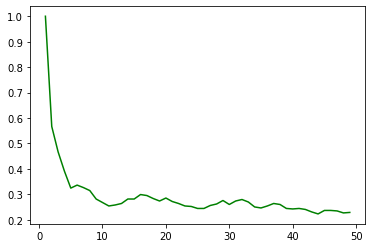

In [107]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Green',)
plt.show()

In [108]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.32421875


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [110]:
print(X_train.shape)
print(y_train.shape)

(307, 6)
(307,)


In [111]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.1073170731707317

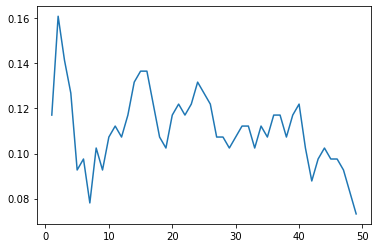

In [112]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()